In [318]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [319]:
data = pd.read_csv('train.csv')

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [321]:
target = data['Survived']
data =data.drop('Survived',axis=1)

In [322]:
data.fillna(0,inplace=True)

In [323]:
data = data.drop(['Name','SibSp','Ticket','Cabin','Embarked','Parch','Pclass'],axis=1)


In [324]:
data

,PassengerId,Sex,Age,Fare
0,1,male,22.0,7.2500
1,2,female,38.0,71.2833
2,3,female,26.0,7.9250
3,4,female,35.0,53.1000
4,5,male,35.0,8.0500
...,...,...,...,...
886,887,male,27.0,13.0000
887,888,female,19.0,30.0000
888,889,female,0.0,23.4500
889,890,male,26.0,30.0000


In [325]:
data.fillna(0.0)

,PassengerId,Sex,Age,Fare
0,1,male,22.0,7.2500
1,2,female,38.0,71.2833
2,3,female,26.0,7.9250
3,4,female,35.0,53.1000
4,5,male,35.0,8.0500
...,...,...,...,...
886,887,male,27.0,13.0000
887,888,female,19.0,30.0000
888,889,female,0.0,23.4500
889,890,male,26.0,30.0000


In [326]:
data['Sex'].replace('female',0,inplace=True)

In [327]:
data['Sex'].replace('male',1,inplace=True)

In [328]:
data

,PassengerId,Sex,Age,Fare
0,1,1,22.0,7.2500
1,2,0,38.0,71.2833
2,3,0,26.0,7.9250
3,4,0,35.0,53.1000
4,5,1,35.0,8.0500
...,...,...,...,...
886,887,1,27.0,13.0000
887,888,0,19.0,30.0000
888,889,0,0.0,23.4500
889,890,1,26.0,30.0000


In [329]:
from sklearn.tree import DecisionTreeClassifier

In [330]:
clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.33, random_state=42)

In [331]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [332]:
predict =clf.predict(X_test)

In [333]:
acc = metrics.accuracy_score(y_test,predict)

In [334]:
acc

0.7220338983050848

In [335]:
from sklearn.model_selection import GridSearchCV
parameters ={'criterion' :["gini", "entropy"],
            'splitter': ['best', 'random'],
             'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[10,20,30]
            }
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
grid_fit = grid_obj.fit(data,target)
best_clf = grid_fit.best_estimator_

In [336]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       splitter='random')

In [337]:
predict = best_clf.predict(X_test)

In [338]:
metrics.accuracy_score(y_test,predict)

0.7898305084745763

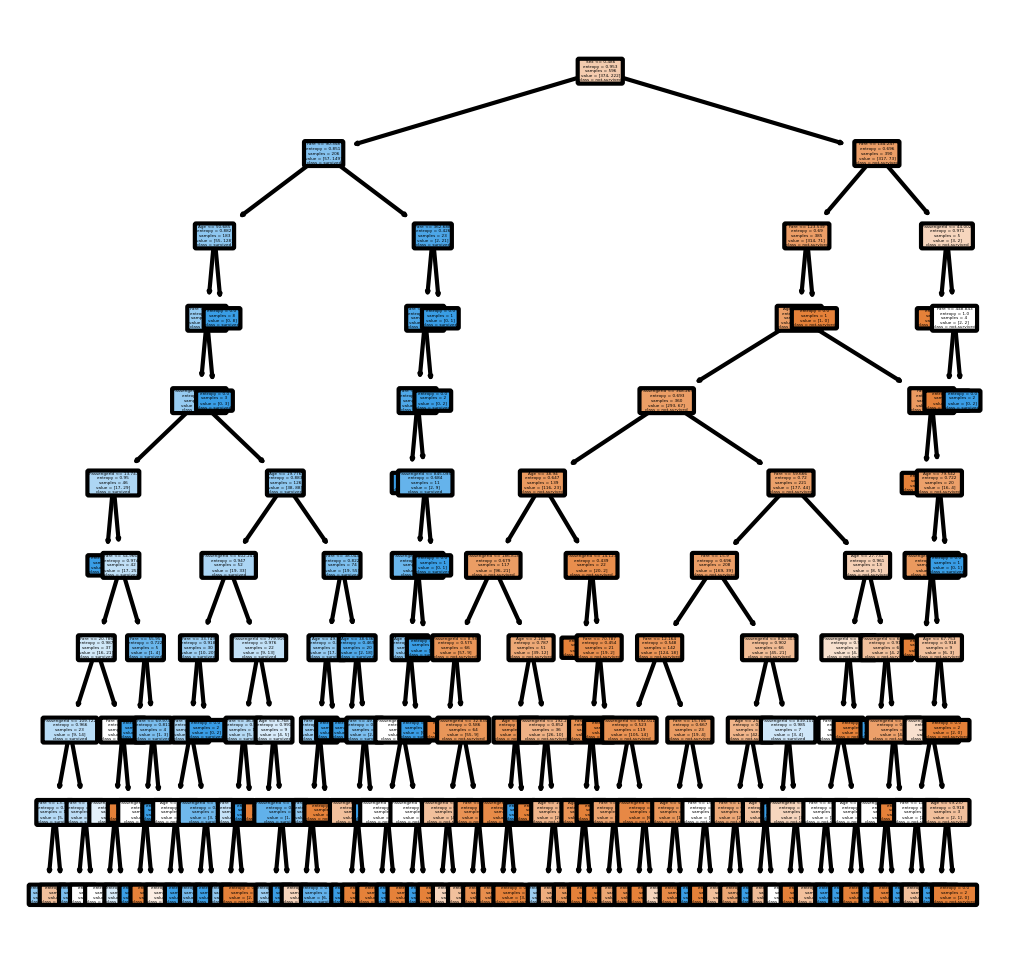

In [345]:
feature_names = ['PassengerId','Sex','Age','Fare']
class_names = ['not-survived','survived']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(best_clf,feature_names=feature_names,class_names=class_names,filled=True,rounded=True)
fig.savefig('titanic.png')

In [340]:
# test = pd.read_csv('test.csv')
# test = test.drop(['Name','SibSp','Ticket','Cabin','Embarked','Parch','Pclass'],axis=1)

In [341]:
# test['Sex'].replace('female',0,inplace=True)
# test['Sex'].replace('male',1,inplace=True)

In [342]:
# test

In [343]:
# test = test.fillna(0.0)
# test_predict = best_clf.predict(test)

In [344]:
# sub = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':test_predict})
# sub.to_csv('New.csv',index=False)